In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, datasets
from torchvision.io import read_image
from tqdm import tqdm


data_root = os.path.abspath(os.path.join(os.getcwd(), "archive"))
train_image_root = os.path.join(data_root, "Train Images 13440x32x32/train")
test_image_root = os.path.join(data_root, "Test Images 3360x32x32/test")
assert os.path.exists(train_image_root), "{} path does not exist".format(train_image_root)
assert os.path.exists(test_image_root), "{} path does not exist".format(test_image_root)

In [25]:
class ArabicCharactersDataset(Dataset):
    def __init__(self, img_dir, transform=None, target_transform=None):
        self.images_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
        assert os.path.exists(self.images_dir), "{} path does not exist".format(self.images_dir)
        self.images_name = os.listdir(self.images_dir)

    def __len__(self):
        return len(self.images_name)

    def __getitem__(self, idx):
        img_name = self.images_name[idx]
        img_path = os.path.join(self.images_dir, img_name)
        img = read_image(img_path)
        img = img.byte()
        print(img.dtype)
        img_name = img_name[:-4]    # remove suffix
        label = img_name.split('_')[-1]
        label = int(label)
        if self.transform:
            img = self.transform(img)
        if self.target_transform:
            label = self.target_transform(label)
        return img, label

torch.uint8
torch.uint8
torch.uint8
torch.uint8
torch.uint8
torch.uint8
torch.uint8
torch.uint8
torch.uint8
torch.uint8
torch.uint8
torch.uint8
torch.uint8
torch.uint8
torch.uint8
torch.uint8
torch.uint8
torch.uint8
torch.uint8
torch.uint8
torch.uint8
torch.uint8
torch.uint8
torch.uint8
torch.uint8
torch.uint8
torch.uint8
torch.uint8
torch.uint8
torch.uint8
torch.uint8
torch.uint8
torch.uint8
torch.uint8
torch.uint8
torch.uint8
torch.uint8
torch.uint8
torch.uint8
torch.uint8
torch.uint8
torch.uint8
torch.uint8
torch.uint8
torch.uint8
torch.uint8
torch.uint8
torch.uint8
torch.uint8
torch.uint8
torch.uint8
torch.uint8
torch.uint8
torch.uint8
torch.uint8
torch.uint8
torch.uint8
torch.uint8
torch.uint8
torch.uint8
torch.uint8
torch.uint8
torch.uint8
torch.uint8
Feature batch shape: torch.uint8
Labels batch shape: torch.Size([64])
torch.Size([64, 1, 32, 32])
Label: 3


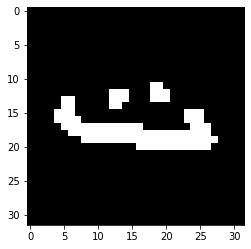

In [26]:
train_data = ArabicCharactersDataset(train_image_root)
test_data = ArabicCharactersDataset(test_image_root)

train_dataloader = DataLoader(train_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.dtype}")
print(f"Labels batch shape: {train_labels.size()}")
print(train_features.shape)
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")